# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

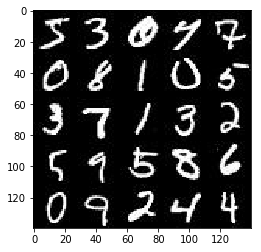

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

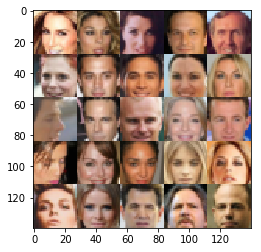

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.2.0


/Users/brad/.pyenv/versions/anaconda3-4.2.0/envs/tflearn/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real') 
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')    
    learning_rate = tf.placeholder(tf.float32, (), name="learning_late")

    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
alpha = 0.01
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    with tf.variable_scope('discriminator', reuse=reuse):
        l1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        l1 = tf.layers.batch_normalization(l1, training=True)
        relu1 = tf.maximum(alpha * l1, l1)
        # 14 x 14 x 64
        
        l2 = tf.layers.conv2d(images, 128, 5, strides=2, padding='same')
        l2 = tf.layers.batch_normalization(l2, training=True)
        relu2 = tf.maximum(alpha * l2, l2)
        # 7 x 7 x 128
                
        l3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        l3 = tf.layers.batch_normalization(l3, training=True)
        relu3 = tf.maximum(alpha * l3, l3)
        # 4 x 4 x 256
        
        flat = tf.reshape(relu3, (-1, 4 * 4 * 256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits    
    
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    with tf.variable_scope('generator', reuse=not is_train):
        l1 = tf.layers.dense(z, 7 * 7 * 256)
        l1 = tf.reshape(l1, (-1, 7, 7, 256))
        l1 = tf.layers.batch_normalization(l1, training=is_train)
        # 7 x 7 x 256
        
        l2 = tf.layers.conv2d_transpose(l1, 128, 5, strides=2, padding='same')
        l2 = tf.layers.batch_normalization(l2, training=is_train)
        l2 = tf.nn.relu(l2)
        # 14 x 14 x 128
        
        l3 = tf.layers.conv2d_transpose(l2, 64, 5, strides=2, padding='same')
        l3 = tf.layers.batch_normalization(l3, training=is_train)
        l3 = tf.nn.relu(l3)
        # 28 x 28 x 64        
        
        # Output layer
        logits = tf.layers.conv2d_transpose(l3, out_channel_dim, 5, strides=1, padding='same')
        # 28 x 28 x 3
        
        out = tf.tanh(logits)
        
        return out
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    smooth = 0.1
    
    g_model = generator(input_z, out_channel_dim, is_train=True)
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    # TODO: Implement Function
    d_loss_real = tf.reduce_mean(
                      tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, 
                                                              labels=tf.ones_like(d_logits_real) * (1 - smooth)))
    d_loss_fake = tf.reduce_mean(
                      tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, 
                                                              labels=tf.zeros_like(d_logits_real)))
    d_loss = d_loss_real + d_loss_fake

    g_loss = tf.reduce_mean(
                 tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,
                                                         labels=tf.ones_like(d_logits_fake)))    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

        return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    steps = 0
    
    input_real, input_z, _ = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)    
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images *= 2
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z})                
                _ = sess.run(g_train_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                
                if steps % 100 == 0:
                    train_loss_d = sess.run(d_loss, feed_dict={input_real: batch_images, input_z: batch_z})
                    train_loss_g = g_loss.eval({input_z: batch_z})
                    
                    print("Epoch {}/{}...".format(epoch_i + 1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))    
                    
                    show_generator_output(sess, 16, input_z, data_shape[3], data_image_mode)
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

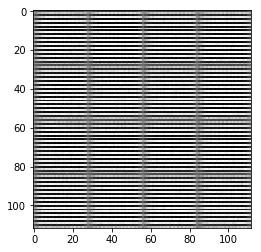

Epoch 1/2... Discriminator Loss: 0.6906... Generator Loss: 1.4103


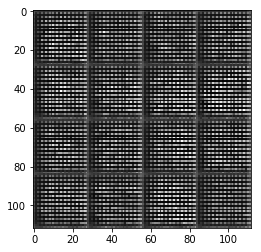

Epoch 1/2... Discriminator Loss: 0.8334... Generator Loss: 1.3711


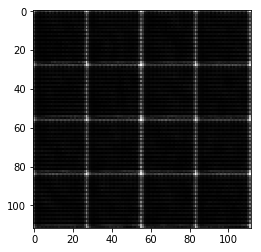

Epoch 1/2... Discriminator Loss: 0.4451... Generator Loss: 3.8850


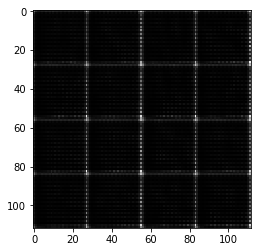

Epoch 1/2... Discriminator Loss: 0.3593... Generator Loss: 3.8868


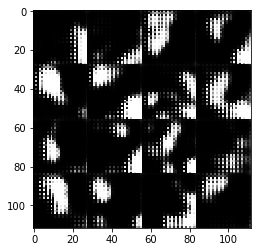

Epoch 1/2... Discriminator Loss: 2.4126... Generator Loss: 4.1744


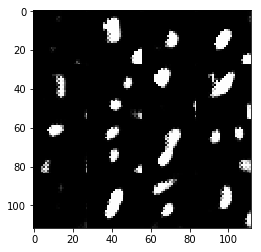

Epoch 1/2... Discriminator Loss: 1.4113... Generator Loss: 0.5571


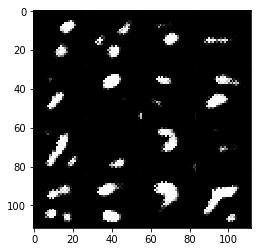

Epoch 1/2... Discriminator Loss: 1.6659... Generator Loss: 0.3763


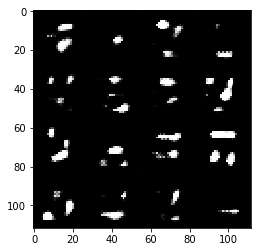

Epoch 1/2... Discriminator Loss: 1.2295... Generator Loss: 0.9916


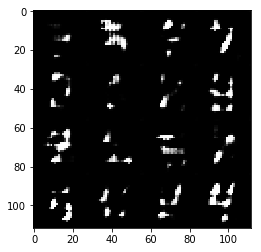

Epoch 1/2... Discriminator Loss: 1.6219... Generator Loss: 2.1624


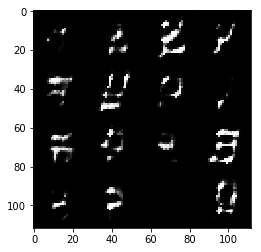

Epoch 1/2... Discriminator Loss: 1.4911... Generator Loss: 1.4561


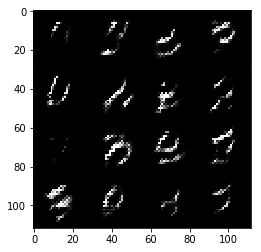

Epoch 1/2... Discriminator Loss: 1.4506... Generator Loss: 1.2726


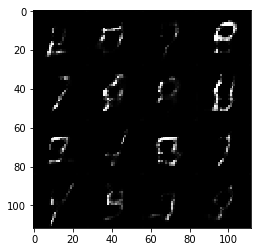

Epoch 1/2... Discriminator Loss: 1.5543... Generator Loss: 1.6103


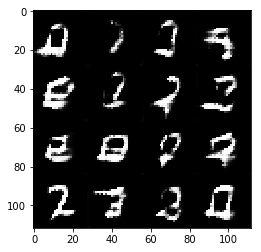

Epoch 1/2... Discriminator Loss: 1.4146... Generator Loss: 1.1095


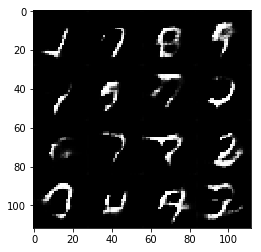

Epoch 1/2... Discriminator Loss: 1.3517... Generator Loss: 1.0326


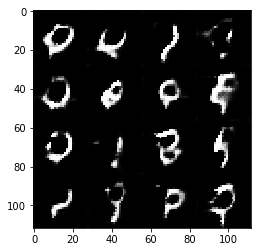

Epoch 1/2... Discriminator Loss: 1.5168... Generator Loss: 1.4233


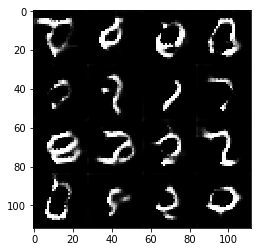

Epoch 1/2... Discriminator Loss: 1.5318... Generator Loss: 1.6576


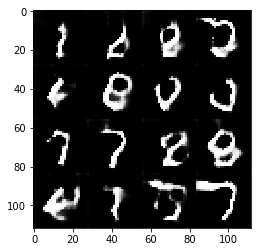

Epoch 1/2... Discriminator Loss: 1.5316... Generator Loss: 1.4847


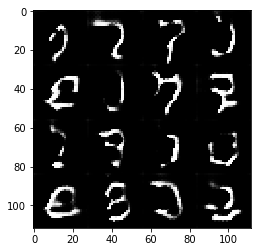

Epoch 1/2... Discriminator Loss: 1.5602... Generator Loss: 1.2995


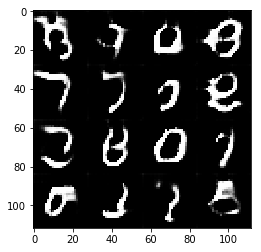

Epoch 1/2... Discriminator Loss: 1.4159... Generator Loss: 1.3854


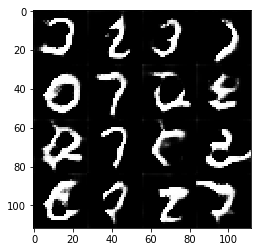

Epoch 1/2... Discriminator Loss: 1.2987... Generator Loss: 0.9365


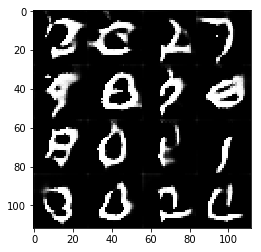

Epoch 1/2... Discriminator Loss: 1.6765... Generator Loss: 0.3420


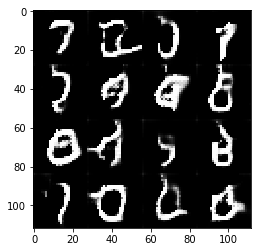

Epoch 1/2... Discriminator Loss: 1.3916... Generator Loss: 0.8782


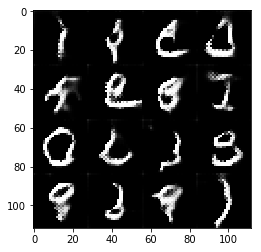

Epoch 1/2... Discriminator Loss: 1.3770... Generator Loss: 0.6184


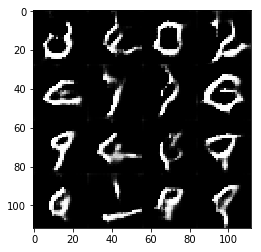

Epoch 1/2... Discriminator Loss: 1.5573... Generator Loss: 0.4080


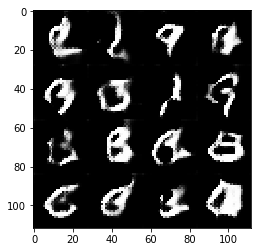

Epoch 1/2... Discriminator Loss: 1.3859... Generator Loss: 0.5499


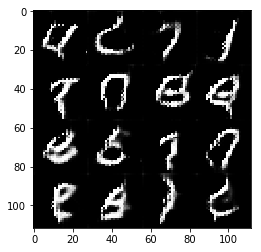

Epoch 1/2... Discriminator Loss: 1.4442... Generator Loss: 0.5013


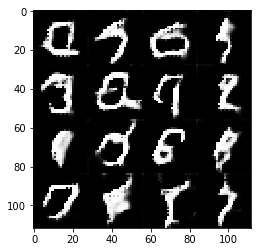

Epoch 1/2... Discriminator Loss: 1.4781... Generator Loss: 0.4989


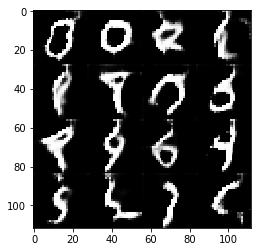

Epoch 1/2... Discriminator Loss: 1.3975... Generator Loss: 0.6124


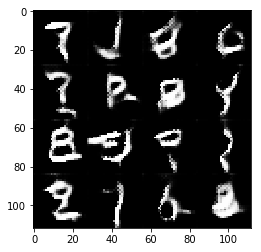

Epoch 1/2... Discriminator Loss: 1.5144... Generator Loss: 0.4653


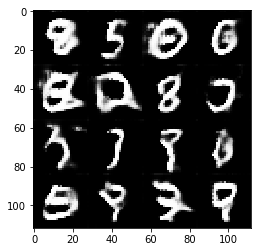

Epoch 1/2... Discriminator Loss: 1.4846... Generator Loss: 0.4913


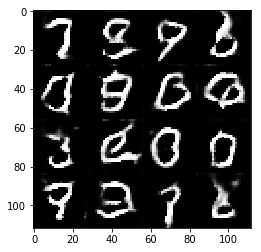

Epoch 1/2... Discriminator Loss: 1.3811... Generator Loss: 0.6520


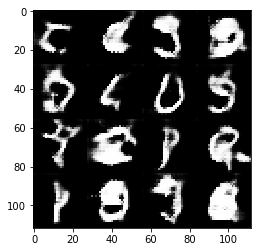

Epoch 1/2... Discriminator Loss: 1.4468... Generator Loss: 0.5207


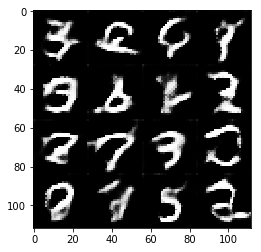

Epoch 1/2... Discriminator Loss: 1.5157... Generator Loss: 0.4513


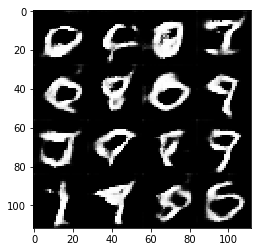

Epoch 1/2... Discriminator Loss: 1.3589... Generator Loss: 0.9516


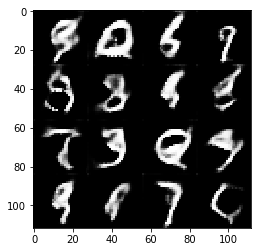

Epoch 1/2... Discriminator Loss: 1.3643... Generator Loss: 1.0842


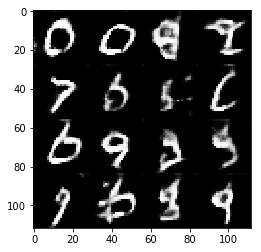

Epoch 1/2... Discriminator Loss: 1.4959... Generator Loss: 1.2208


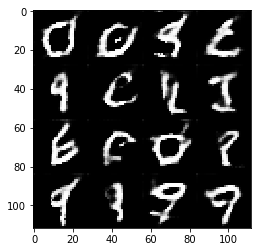

Epoch 1/2... Discriminator Loss: 1.4029... Generator Loss: 0.6024


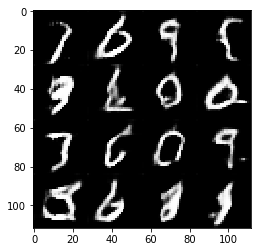

Epoch 1/2... Discriminator Loss: 1.3524... Generator Loss: 0.7515


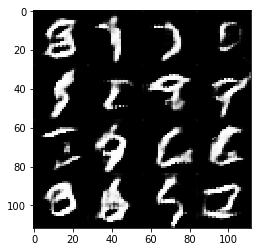

Epoch 1/2... Discriminator Loss: 1.4165... Generator Loss: 1.2729


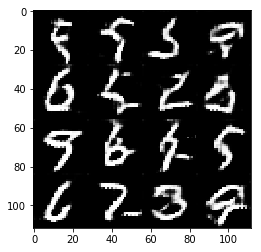

Epoch 1/2... Discriminator Loss: 1.5846... Generator Loss: 1.4574


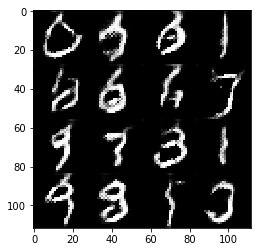

Epoch 1/2... Discriminator Loss: 1.3205... Generator Loss: 0.7594


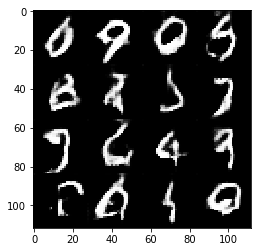

Epoch 1/2... Discriminator Loss: 1.3351... Generator Loss: 0.7890


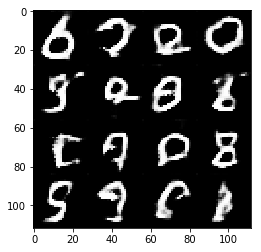

Epoch 1/2... Discriminator Loss: 1.3442... Generator Loss: 0.9415


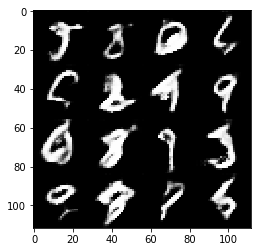

Epoch 1/2... Discriminator Loss: 1.4123... Generator Loss: 1.1932


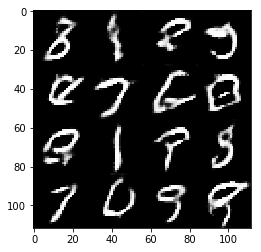

Epoch 1/2... Discriminator Loss: 1.4132... Generator Loss: 1.2645


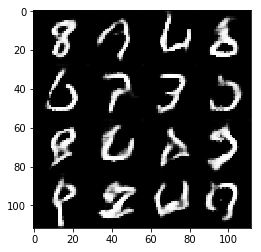

Epoch 1/2... Discriminator Loss: 1.4899... Generator Loss: 1.3645


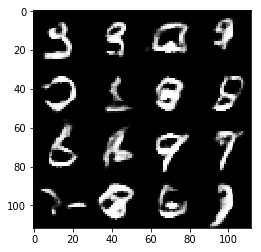

Epoch 1/2... Discriminator Loss: 1.4189... Generator Loss: 1.0690


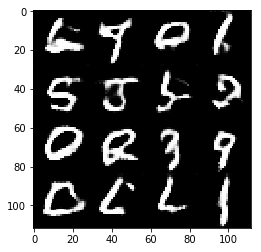

Epoch 1/2... Discriminator Loss: 1.3987... Generator Loss: 1.1041


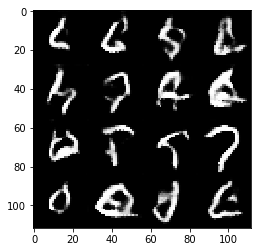

Epoch 1/2... Discriminator Loss: 1.4939... Generator Loss: 1.2970


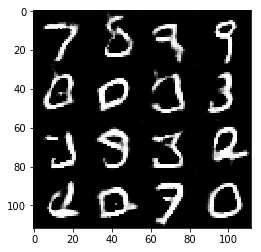

Epoch 1/2... Discriminator Loss: 1.3855... Generator Loss: 0.5894


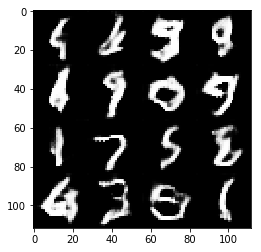

Epoch 1/2... Discriminator Loss: 1.3794... Generator Loss: 0.5818


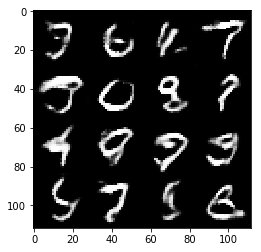

Epoch 1/2... Discriminator Loss: 1.3364... Generator Loss: 0.7582


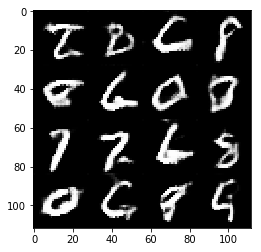

Epoch 1/2... Discriminator Loss: 1.4152... Generator Loss: 0.5587


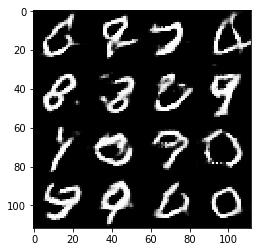

Epoch 1/2... Discriminator Loss: 1.3962... Generator Loss: 0.5593


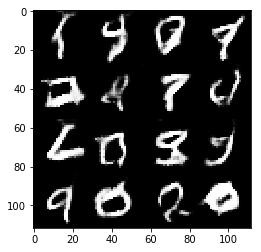

Epoch 1/2... Discriminator Loss: 1.3065... Generator Loss: 0.7756


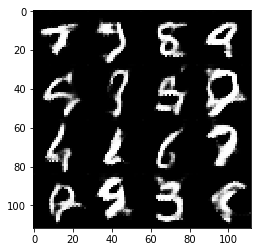

Epoch 1/2... Discriminator Loss: 1.3181... Generator Loss: 0.7635


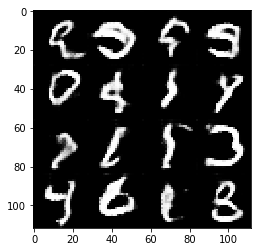

Epoch 1/2... Discriminator Loss: 1.3869... Generator Loss: 0.5995


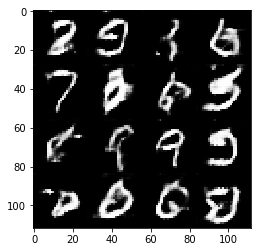

Epoch 1/2... Discriminator Loss: 1.3491... Generator Loss: 1.0138


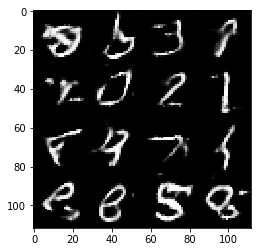

Epoch 1/2... Discriminator Loss: 1.2924... Generator Loss: 1.0212


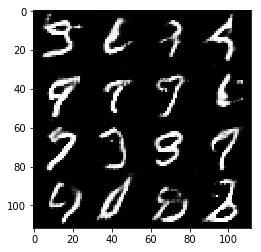

Epoch 1/2... Discriminator Loss: 1.3243... Generator Loss: 0.6985


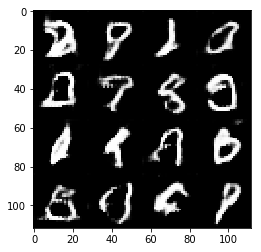

Epoch 1/2... Discriminator Loss: 1.3957... Generator Loss: 0.5598


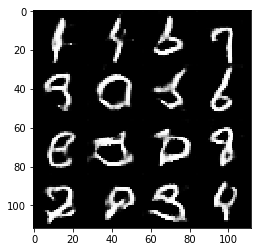

Epoch 1/2... Discriminator Loss: 1.3290... Generator Loss: 0.6360


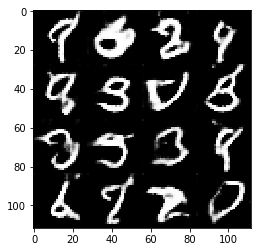

Epoch 1/2... Discriminator Loss: 1.2739... Generator Loss: 0.8157


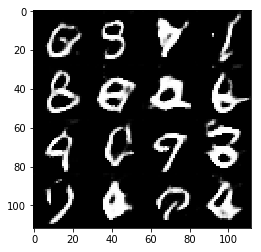

Epoch 1/2... Discriminator Loss: 1.2359... Generator Loss: 1.0013


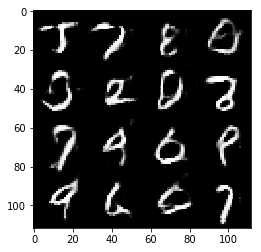

Epoch 1/2... Discriminator Loss: 1.5715... Generator Loss: 1.5200


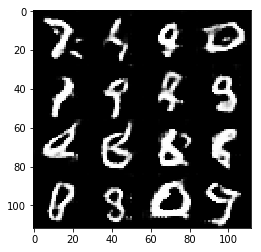

Epoch 1/2... Discriminator Loss: 1.3916... Generator Loss: 0.5658


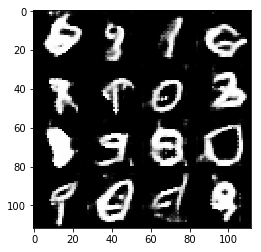

Epoch 1/2... Discriminator Loss: 1.3507... Generator Loss: 0.6255


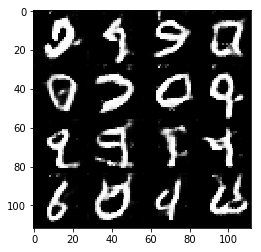

Epoch 1/2... Discriminator Loss: 1.2390... Generator Loss: 0.7999


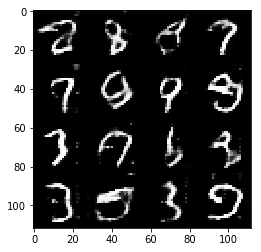

Epoch 1/2... Discriminator Loss: 1.2980... Generator Loss: 1.0417


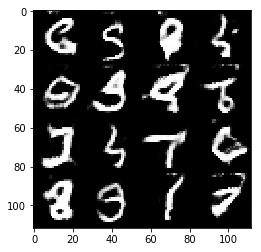

Epoch 1/2... Discriminator Loss: 1.5339... Generator Loss: 1.7254


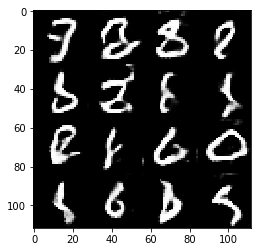

Epoch 1/2... Discriminator Loss: 1.2504... Generator Loss: 0.6990


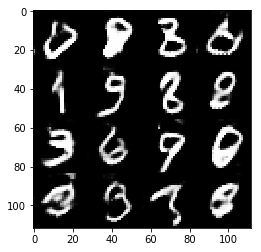

Epoch 1/2... Discriminator Loss: 1.3052... Generator Loss: 0.8208


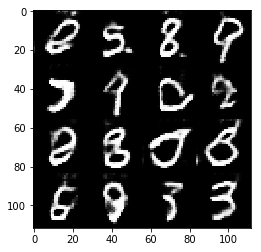

Epoch 1/2... Discriminator Loss: 1.2049... Generator Loss: 0.9604


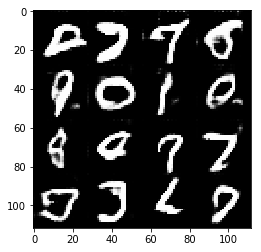

Epoch 1/2... Discriminator Loss: 1.3330... Generator Loss: 0.5662


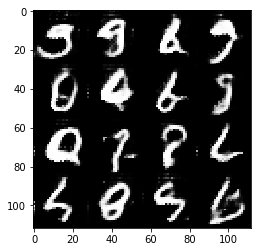

Epoch 1/2... Discriminator Loss: 1.2993... Generator Loss: 0.7292


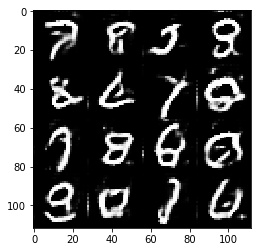

Epoch 1/2... Discriminator Loss: 1.2515... Generator Loss: 0.6882


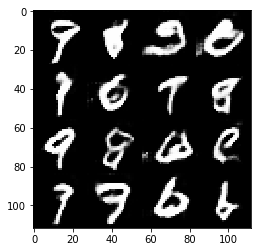

Epoch 1/2... Discriminator Loss: 1.2691... Generator Loss: 0.8926


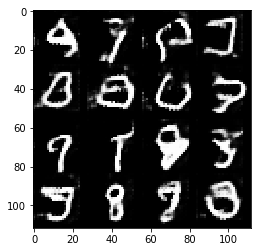

Epoch 1/2... Discriminator Loss: 1.4009... Generator Loss: 1.1591


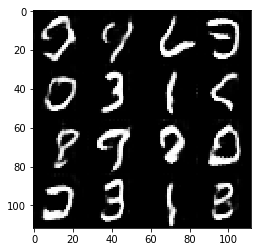

Epoch 1/2... Discriminator Loss: 1.3449... Generator Loss: 1.1831


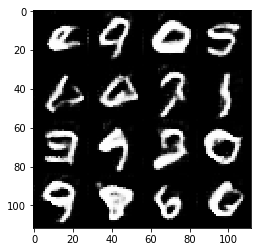

Epoch 1/2... Discriminator Loss: 1.1886... Generator Loss: 0.9441


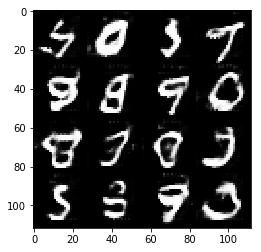

Epoch 1/2... Discriminator Loss: 1.3858... Generator Loss: 0.5042


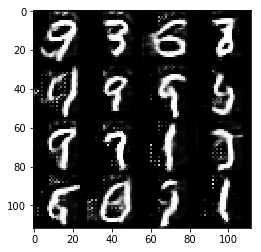

Epoch 1/2... Discriminator Loss: 1.2354... Generator Loss: 0.9990


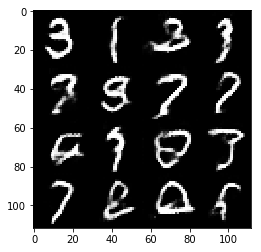

Epoch 1/2... Discriminator Loss: 1.4936... Generator Loss: 0.4515


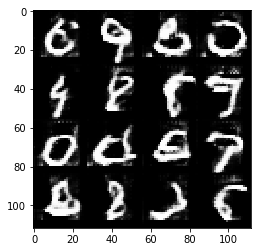

Epoch 1/2... Discriminator Loss: 1.3469... Generator Loss: 1.0696


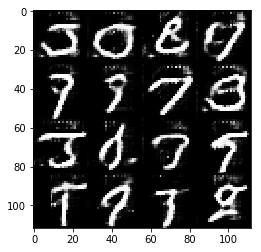

Epoch 1/2... Discriminator Loss: 1.3459... Generator Loss: 1.0133


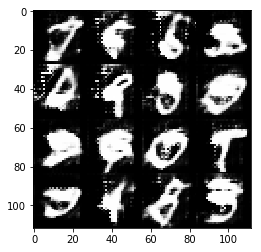

Epoch 1/2... Discriminator Loss: 2.0361... Generator Loss: 0.3079


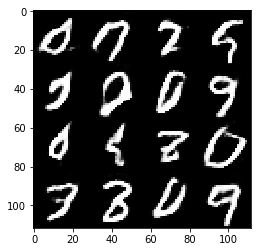

Epoch 1/2... Discriminator Loss: 1.2874... Generator Loss: 0.9881


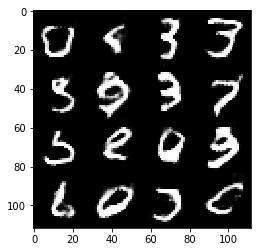

Epoch 1/2... Discriminator Loss: 1.3328... Generator Loss: 1.0631


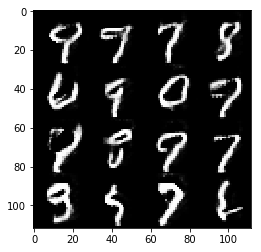

Epoch 1/2... Discriminator Loss: 1.3206... Generator Loss: 1.3335


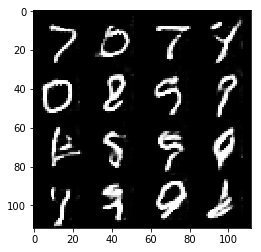

Epoch 1/2... Discriminator Loss: 1.3173... Generator Loss: 1.0180


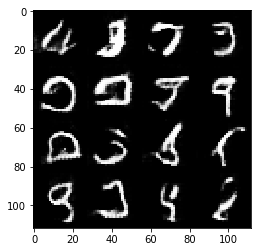

Epoch 1/2... Discriminator Loss: 1.2450... Generator Loss: 0.8641


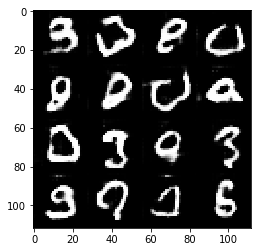

Epoch 1/2... Discriminator Loss: 1.3455... Generator Loss: 1.3666


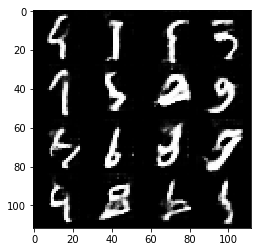

Epoch 1/2... Discriminator Loss: 1.5624... Generator Loss: 0.4083


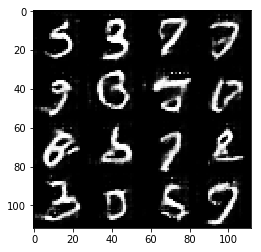

Epoch 2/2... Discriminator Loss: 1.3074... Generator Loss: 0.6830


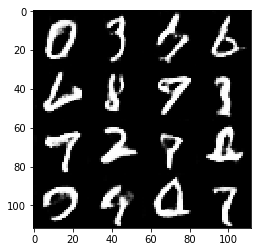

Epoch 2/2... Discriminator Loss: 1.1956... Generator Loss: 0.8418


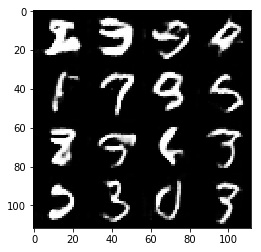

Epoch 2/2... Discriminator Loss: 1.2629... Generator Loss: 0.6683


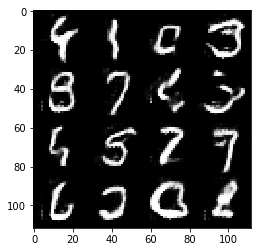

Epoch 2/2... Discriminator Loss: 1.9150... Generator Loss: 2.2032


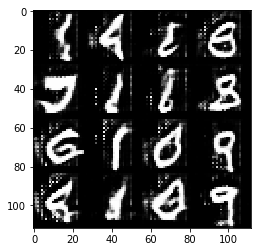

Epoch 2/2... Discriminator Loss: 1.2724... Generator Loss: 0.9334


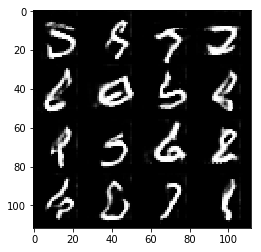

Epoch 2/2... Discriminator Loss: 1.3419... Generator Loss: 1.3637


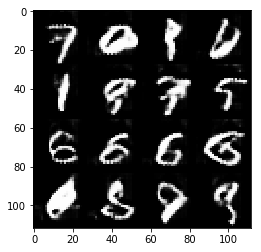

Epoch 2/2... Discriminator Loss: 1.1478... Generator Loss: 1.0293


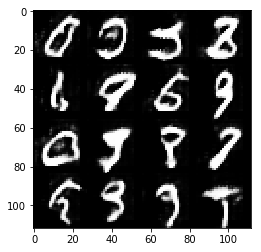

Epoch 2/2... Discriminator Loss: 1.7820... Generator Loss: 0.3322


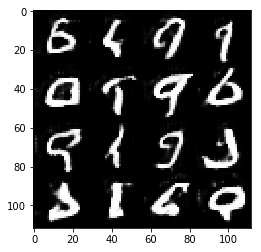

Epoch 2/2... Discriminator Loss: 1.2101... Generator Loss: 0.8599


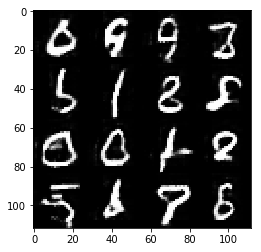

Epoch 2/2... Discriminator Loss: 1.1485... Generator Loss: 0.8183


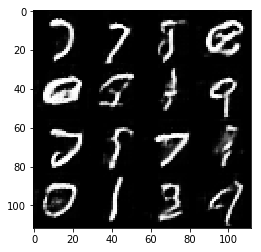

Epoch 2/2... Discriminator Loss: 1.2819... Generator Loss: 0.9552


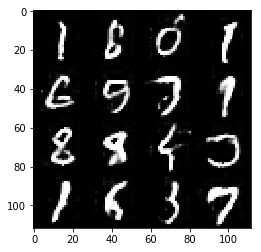

Epoch 2/2... Discriminator Loss: 1.2927... Generator Loss: 1.1717


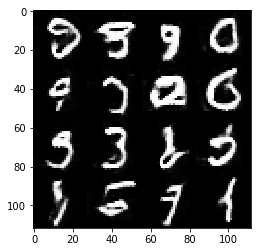

Epoch 2/2... Discriminator Loss: 1.1482... Generator Loss: 0.7980


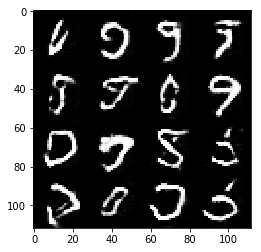

Epoch 2/2... Discriminator Loss: 1.1783... Generator Loss: 1.1046


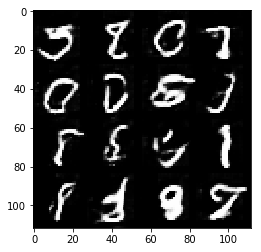

Epoch 2/2... Discriminator Loss: 1.2929... Generator Loss: 0.6339


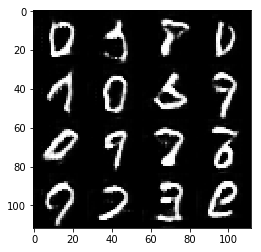

Epoch 2/2... Discriminator Loss: 1.2460... Generator Loss: 1.2375


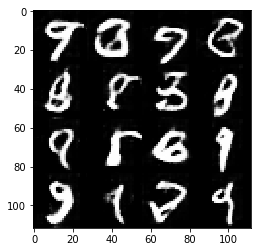

Epoch 2/2... Discriminator Loss: 1.2777... Generator Loss: 1.1998


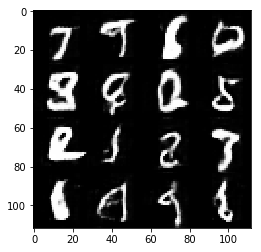

Epoch 2/2... Discriminator Loss: 1.3019... Generator Loss: 0.6070


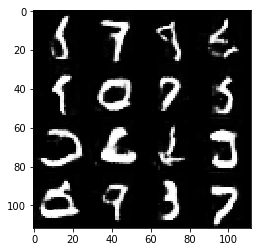

Epoch 2/2... Discriminator Loss: 1.2140... Generator Loss: 0.7042


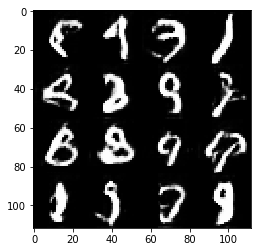

Epoch 2/2... Discriminator Loss: 1.2831... Generator Loss: 0.7036


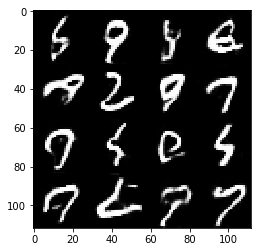

Epoch 2/2... Discriminator Loss: 1.1014... Generator Loss: 0.9299


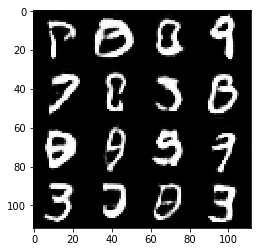

Epoch 2/2... Discriminator Loss: 1.2374... Generator Loss: 0.6658


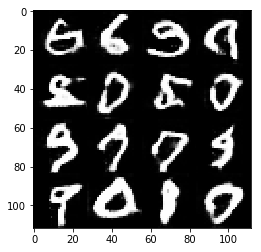

Epoch 2/2... Discriminator Loss: 1.5330... Generator Loss: 0.4390


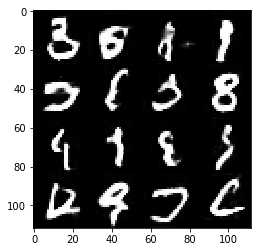

Epoch 2/2... Discriminator Loss: 1.2716... Generator Loss: 1.0006


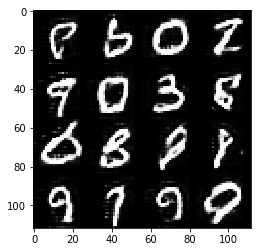

Epoch 2/2... Discriminator Loss: 1.1885... Generator Loss: 0.9783


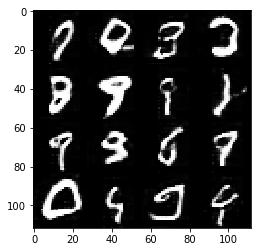

Epoch 2/2... Discriminator Loss: 1.2717... Generator Loss: 0.7675


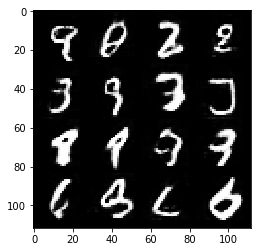

Epoch 2/2... Discriminator Loss: 1.3809... Generator Loss: 0.4977


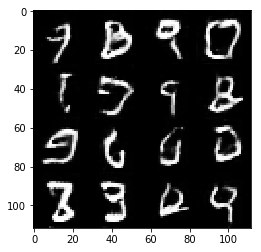

Epoch 2/2... Discriminator Loss: 1.3133... Generator Loss: 0.6606


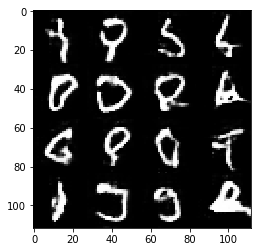

Epoch 2/2... Discriminator Loss: 1.3847... Generator Loss: 0.9830


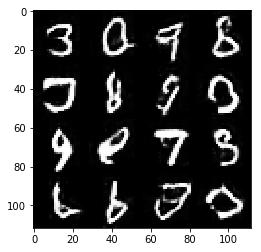

Epoch 2/2... Discriminator Loss: 1.2445... Generator Loss: 0.9937


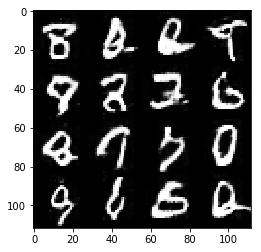

Epoch 2/2... Discriminator Loss: 1.1726... Generator Loss: 0.9644


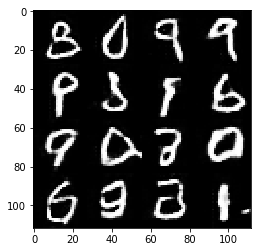

Epoch 2/2... Discriminator Loss: 1.4298... Generator Loss: 0.5048


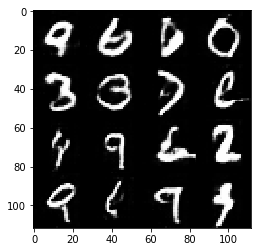

Epoch 2/2... Discriminator Loss: 1.4731... Generator Loss: 1.6295


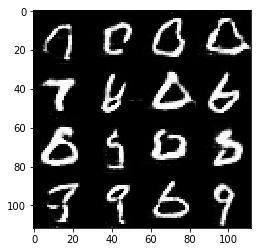

Epoch 2/2... Discriminator Loss: 1.1464... Generator Loss: 0.9621


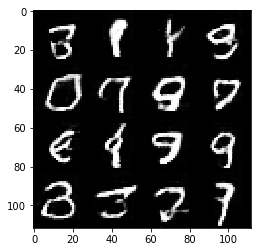

Epoch 2/2... Discriminator Loss: 1.3186... Generator Loss: 0.6286


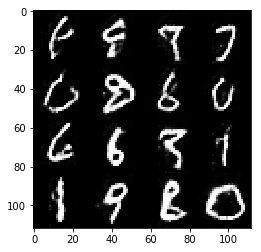

Epoch 2/2... Discriminator Loss: 1.3205... Generator Loss: 0.5515


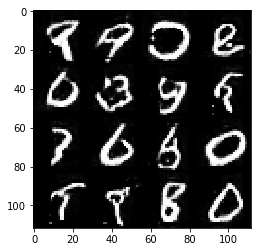

Epoch 2/2... Discriminator Loss: 1.2283... Generator Loss: 0.8484


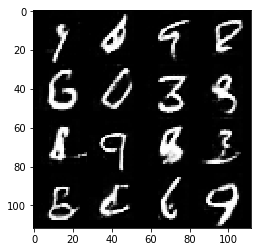

Epoch 2/2... Discriminator Loss: 1.1253... Generator Loss: 1.1267


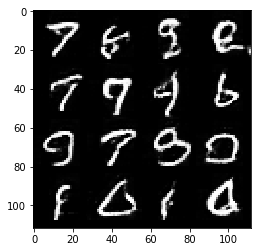

Epoch 2/2... Discriminator Loss: 1.2430... Generator Loss: 0.8943


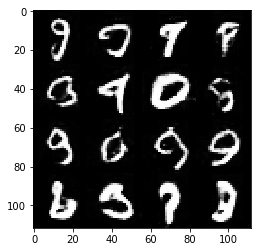

Epoch 2/2... Discriminator Loss: 1.5312... Generator Loss: 1.1572


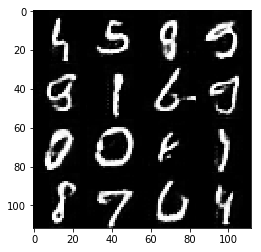

Epoch 2/2... Discriminator Loss: 1.2160... Generator Loss: 1.2104


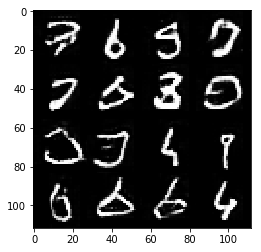

Epoch 2/2... Discriminator Loss: 1.2006... Generator Loss: 0.7393


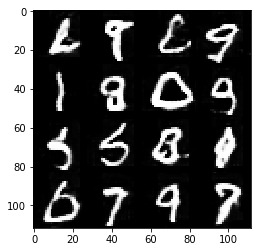

Epoch 2/2... Discriminator Loss: 1.2703... Generator Loss: 0.6813


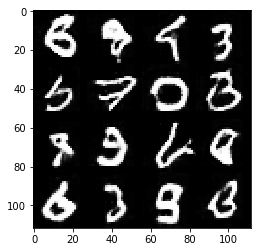

Epoch 2/2... Discriminator Loss: 1.3418... Generator Loss: 0.5607


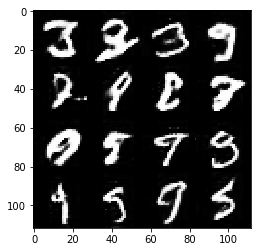

Epoch 2/2... Discriminator Loss: 1.1948... Generator Loss: 1.0710


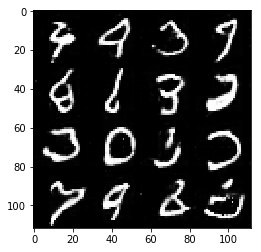

Epoch 2/2... Discriminator Loss: 1.2300... Generator Loss: 1.4386


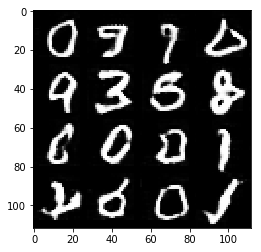

Epoch 2/2... Discriminator Loss: 1.6885... Generator Loss: 1.8294


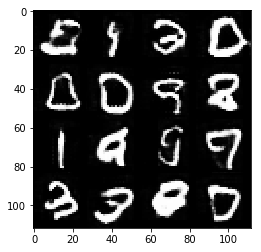

Epoch 2/2... Discriminator Loss: 1.4240... Generator Loss: 0.5109


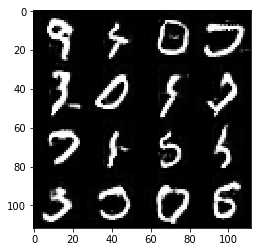

Epoch 2/2... Discriminator Loss: 1.2166... Generator Loss: 1.2478


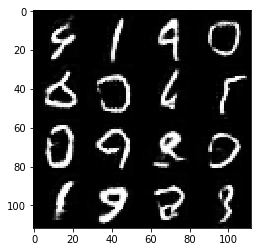

Epoch 2/2... Discriminator Loss: 1.2568... Generator Loss: 0.7407


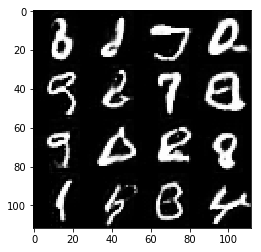

Epoch 2/2... Discriminator Loss: 1.1325... Generator Loss: 1.0247


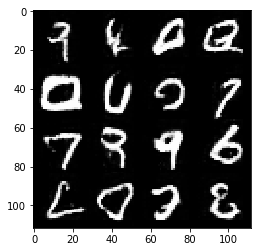

Epoch 2/2... Discriminator Loss: 1.2166... Generator Loss: 1.1210


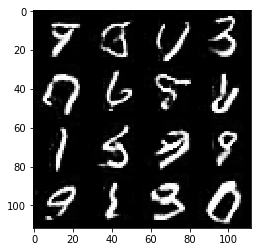

Epoch 2/2... Discriminator Loss: 1.1951... Generator Loss: 0.8355


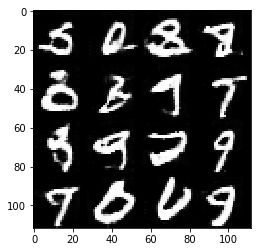

Epoch 2/2... Discriminator Loss: 1.0971... Generator Loss: 0.7942


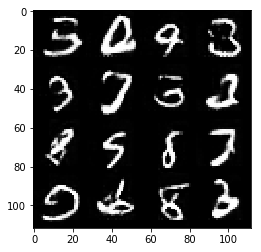

Epoch 2/2... Discriminator Loss: 1.1479... Generator Loss: 0.9262


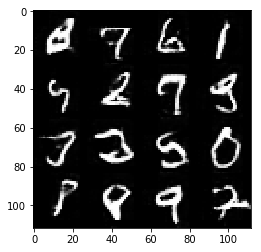

Epoch 2/2... Discriminator Loss: 1.2287... Generator Loss: 0.7589


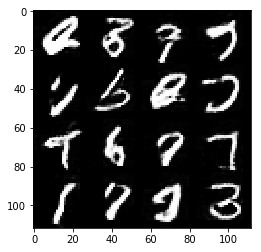

Epoch 2/2... Discriminator Loss: 1.1574... Generator Loss: 1.0918


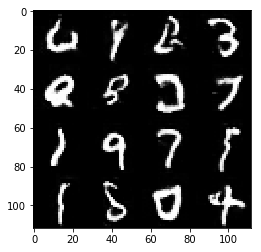

Epoch 2/2... Discriminator Loss: 1.2974... Generator Loss: 0.6855


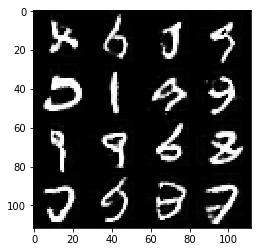

Epoch 2/2... Discriminator Loss: 1.3377... Generator Loss: 0.5175


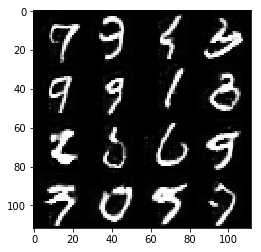

Epoch 2/2... Discriminator Loss: 1.0815... Generator Loss: 1.3344


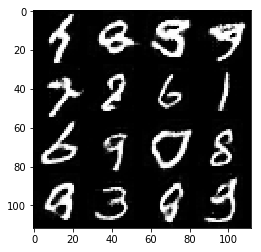

Epoch 2/2... Discriminator Loss: 1.1322... Generator Loss: 1.4481


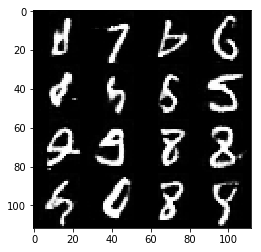

Epoch 2/2... Discriminator Loss: 1.3493... Generator Loss: 0.7042


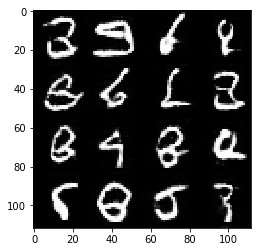

Epoch 2/2... Discriminator Loss: 1.1920... Generator Loss: 1.0186


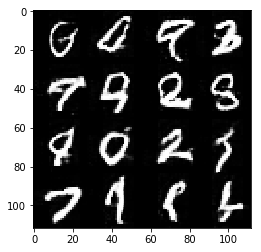

Epoch 2/2... Discriminator Loss: 1.2120... Generator Loss: 1.0113


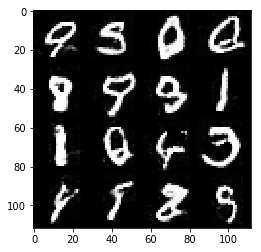

Epoch 2/2... Discriminator Loss: 1.2747... Generator Loss: 0.5931


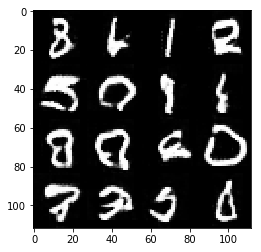

Epoch 2/2... Discriminator Loss: 1.3417... Generator Loss: 0.6001


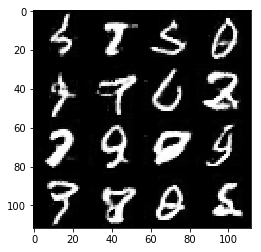

Epoch 2/2... Discriminator Loss: 1.1425... Generator Loss: 1.1319


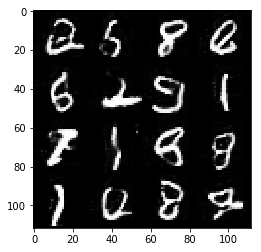

Epoch 2/2... Discriminator Loss: 1.3933... Generator Loss: 0.5135


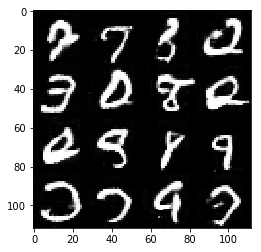

Epoch 2/2... Discriminator Loss: 1.3448... Generator Loss: 1.8945


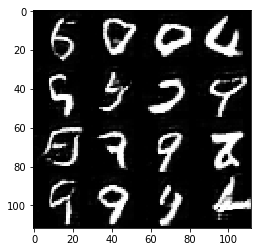

Epoch 2/2... Discriminator Loss: 1.2336... Generator Loss: 0.6650


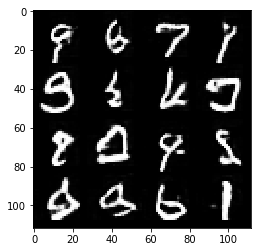

Epoch 2/2... Discriminator Loss: 1.2068... Generator Loss: 0.7378


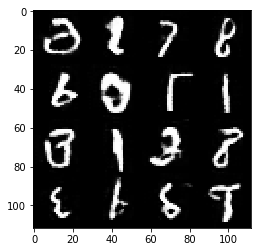

Epoch 2/2... Discriminator Loss: 1.1997... Generator Loss: 1.4284


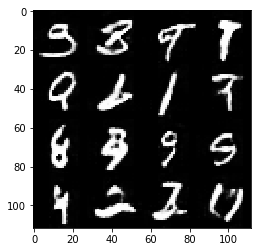

Epoch 2/2... Discriminator Loss: 1.1648... Generator Loss: 1.4905


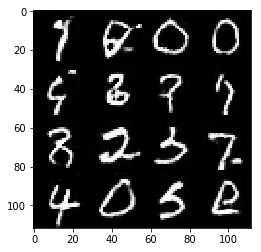

Epoch 2/2... Discriminator Loss: 1.2676... Generator Loss: 0.7107


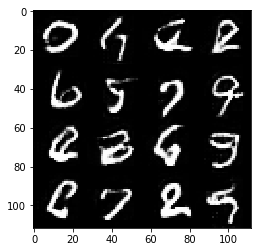

Epoch 2/2... Discriminator Loss: 1.1889... Generator Loss: 1.6262


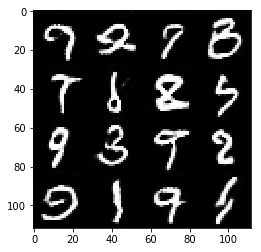

Epoch 2/2... Discriminator Loss: 1.1226... Generator Loss: 0.7650


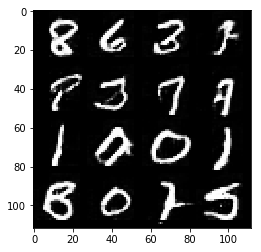

Epoch 2/2... Discriminator Loss: 1.2190... Generator Loss: 0.8088


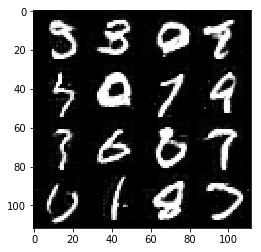

Epoch 2/2... Discriminator Loss: 1.8380... Generator Loss: 0.3288


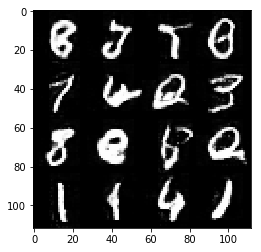

Epoch 2/2... Discriminator Loss: 1.2734... Generator Loss: 0.7210


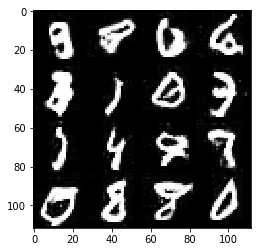

Epoch 2/2... Discriminator Loss: 1.5274... Generator Loss: 0.4145


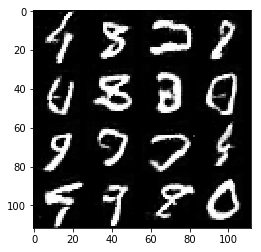

Epoch 2/2... Discriminator Loss: 1.1453... Generator Loss: 1.0405


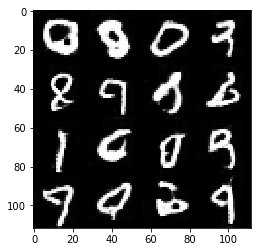

Epoch 2/2... Discriminator Loss: 1.3376... Generator Loss: 1.8256


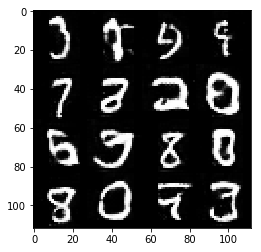

Epoch 2/2... Discriminator Loss: 1.2303... Generator Loss: 0.6436


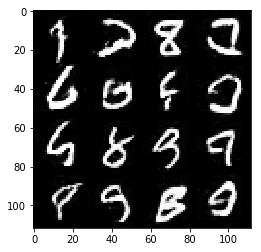

Epoch 2/2... Discriminator Loss: 1.1810... Generator Loss: 1.2504


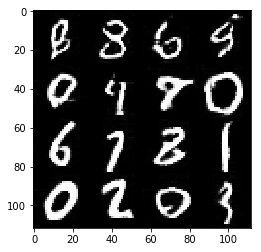

Epoch 2/2... Discriminator Loss: 1.2225... Generator Loss: 0.7322


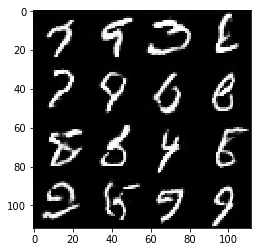

Epoch 2/2... Discriminator Loss: 1.0838... Generator Loss: 0.7630


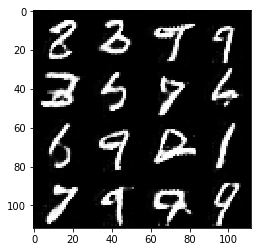

Epoch 2/2... Discriminator Loss: 1.9805... Generator Loss: 1.8441


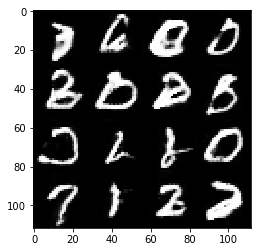

Epoch 2/2... Discriminator Loss: 1.2748... Generator Loss: 1.2357


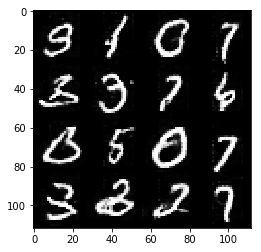

Epoch 2/2... Discriminator Loss: 1.2380... Generator Loss: 0.7872


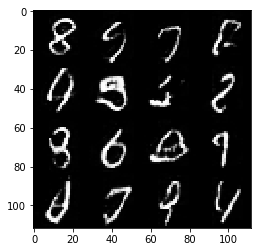

Epoch 2/2... Discriminator Loss: 1.3533... Generator Loss: 0.5291


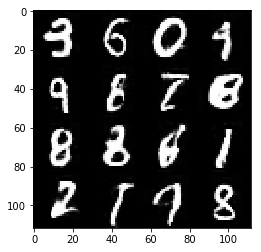

Epoch 2/2... Discriminator Loss: 1.2194... Generator Loss: 0.7001


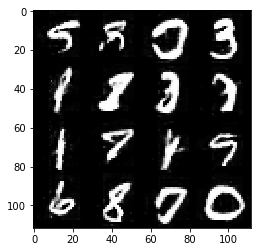

Epoch 2/2... Discriminator Loss: 1.2447... Generator Loss: 1.2607


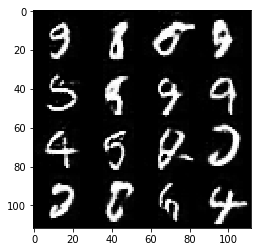

Epoch 2/2... Discriminator Loss: 1.0852... Generator Loss: 1.0929


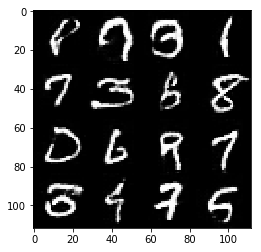

Epoch 2/2... Discriminator Loss: 1.0991... Generator Loss: 1.0745


In [36]:
batch_size = 64
z_dim = 100
learning_rate = 0.005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.5560... Generator Loss: 2.0266


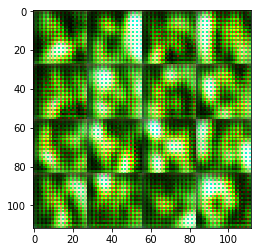

Epoch 1/1... Discriminator Loss: 1.2864... Generator Loss: 0.9656


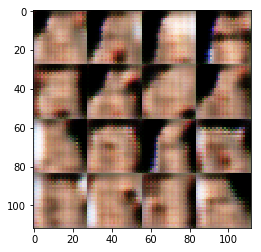

Epoch 1/1... Discriminator Loss: 1.2960... Generator Loss: 1.2002


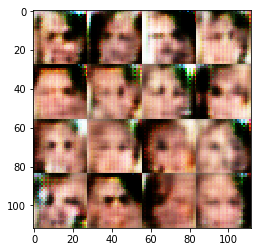

Epoch 1/1... Discriminator Loss: 1.4416... Generator Loss: 0.7517


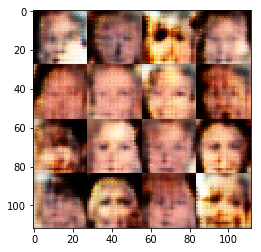

Epoch 1/1... Discriminator Loss: 1.5198... Generator Loss: 0.9827


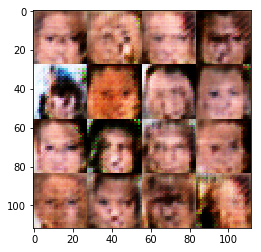

Epoch 1/1... Discriminator Loss: 1.3618... Generator Loss: 0.6719


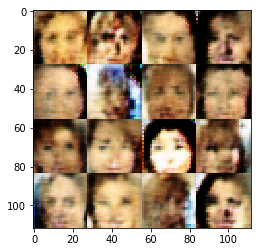

Epoch 1/1... Discriminator Loss: 1.3191... Generator Loss: 0.8627


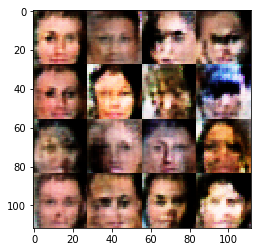

Epoch 1/1... Discriminator Loss: 1.2965... Generator Loss: 0.8796


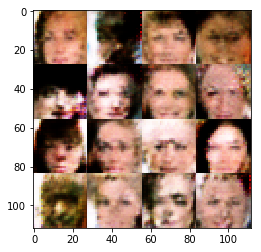

Epoch 1/1... Discriminator Loss: 1.3947... Generator Loss: 0.7773


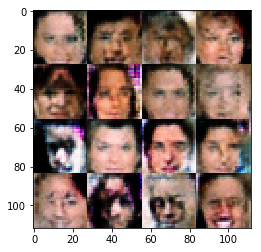

Epoch 1/1... Discriminator Loss: 1.3836... Generator Loss: 0.7704


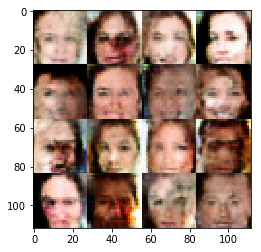

Epoch 1/1... Discriminator Loss: 1.3270... Generator Loss: 0.8666


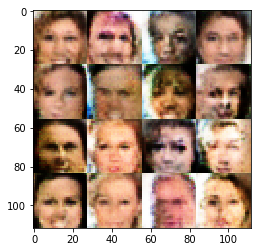

Epoch 1/1... Discriminator Loss: 1.3498... Generator Loss: 0.7457


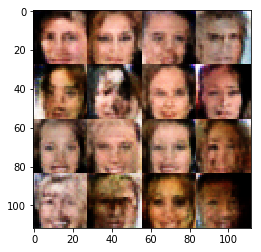

Epoch 1/1... Discriminator Loss: 1.3805... Generator Loss: 0.7497


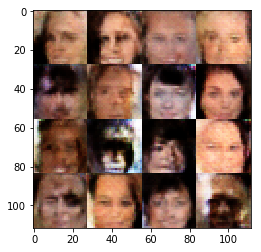

Epoch 1/1... Discriminator Loss: 1.3954... Generator Loss: 1.0006


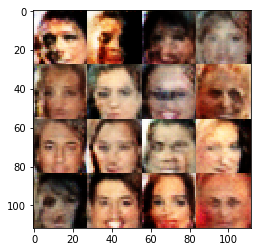

Epoch 1/1... Discriminator Loss: 1.4061... Generator Loss: 0.7136


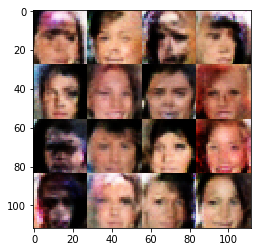

Epoch 1/1... Discriminator Loss: 1.4034... Generator Loss: 1.0601


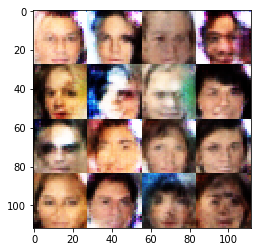

Epoch 1/1... Discriminator Loss: 1.3572... Generator Loss: 0.6871


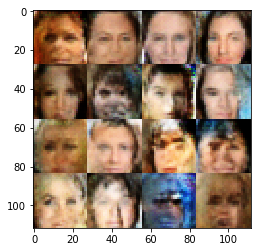

Epoch 1/1... Discriminator Loss: 1.3874... Generator Loss: 0.7497


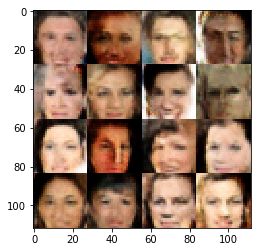

Epoch 1/1... Discriminator Loss: 1.3673... Generator Loss: 0.7477


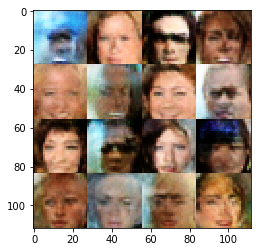

Epoch 1/1... Discriminator Loss: 1.3698... Generator Loss: 0.8054


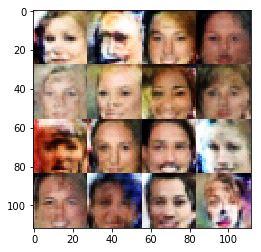

Epoch 1/1... Discriminator Loss: 1.3408... Generator Loss: 0.8394


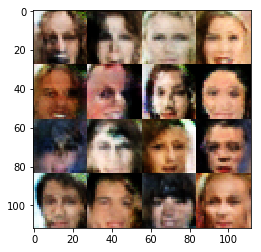

Epoch 1/1... Discriminator Loss: 1.3553... Generator Loss: 0.7613


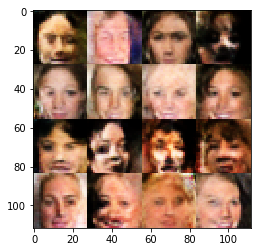

Epoch 1/1... Discriminator Loss: 1.3846... Generator Loss: 0.6222


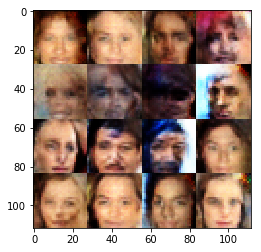

Epoch 1/1... Discriminator Loss: 1.3836... Generator Loss: 0.7228


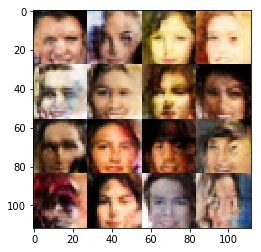

Epoch 1/1... Discriminator Loss: 1.3541... Generator Loss: 0.8153


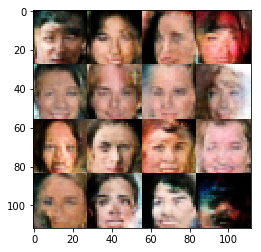

Epoch 1/1... Discriminator Loss: 1.3399... Generator Loss: 0.8357


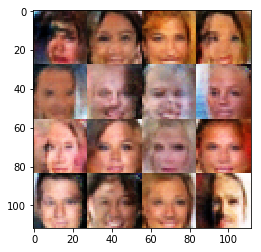

Epoch 1/1... Discriminator Loss: 1.3806... Generator Loss: 0.7449


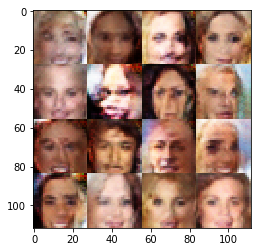

Epoch 1/1... Discriminator Loss: 1.3894... Generator Loss: 0.8271


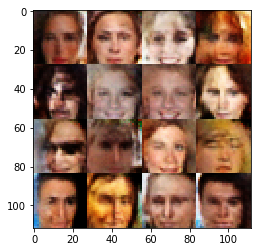

Epoch 1/1... Discriminator Loss: 1.3850... Generator Loss: 0.7515


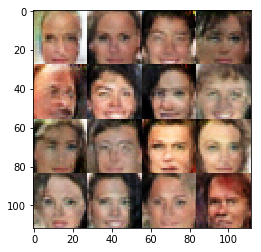

Epoch 1/1... Discriminator Loss: 1.4070... Generator Loss: 0.9159


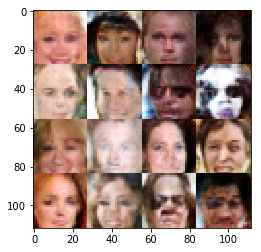

Epoch 1/1... Discriminator Loss: 1.3793... Generator Loss: 0.7781


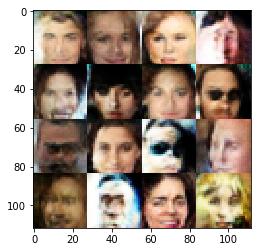

In [12]:
batch_size = 64
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.